## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

## Reading Dataset

In [2]:
df = pd.read_csv('../data/wine_data.csv')
print(df.shape)
df.head()

(21000, 12)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3


In [3]:
df['out'] = df['quality'] >= 6
df['out'] = pd.Series(df['out']).astype(int)
df.sample(5)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,out
17495,13.0,0.66,0.79,41.00,0.381,180.0,269.0,1.01537,3.14,1.13,9.5,8,1
13041,6.0,0.28,0.52,6.20,0.028,37.0,104.0,0.99161,3.28,0.51,11.8,7,1
8026,8.1,0.36,0.59,13.60,0.051,60.0,134.0,0.99886,2.96,0.39,8.7,5,0
7237,5.8,0.33,0.20,16.05,0.047,26.0,166.0,0.99760,3.09,0.46,8.9,5,0
2209,10.2,1.25,0.52,34.00,0.140,202.1,150.7,1.02705,2.91,1.70,12.5,3,0


In [4]:
inputs = df.drop(columns='quality')
inputs.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,out
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,0


In [5]:
inputs = inputs.to_numpy()
inputs

array([[11.6  ,  0.58 ,  0.66 , ...,  0.57 ,  9.   ,  0.   ],
       [10.4  ,  0.61 ,  0.49 , ...,  0.63 ,  8.4  ,  0.   ],
       [ 7.4  ,  1.185,  0.   , ...,  0.54 , 10.7  ,  0.   ],
       ...,
       [13.4  ,  0.46 ,  1.04 , ...,  1.76 ,  9.3  ,  1.   ],
       [ 6.6  ,  1.03 ,  1.09 , ...,  1.54 , 12.9  ,  1.   ],
       [ 9.3  ,  0.93 ,  1.32 , ...,  1.42 , 13.   ,  1.   ]],
      shape=(21000, 12))

In [6]:
inputs_train, inputs_test,  = train_test_split(inputs,test_size=0.2, random_state=42)
inputs_test, inputs_dev = train_test_split(inputs_test, test_size=0.5, random_state=42)


In [7]:
ones = np.where(inputs_train[:, -1] == 1)
zeros = np.where(inputs_train[:, -1] == 0)


In [8]:
ones[0].shape

(9614,)

In [9]:
ones_i = np.random.choice(ones[0], 7186, replace=False)
indices = np.concatenate((ones_i, zeros[0]))
indices


array([ 9240, 16441,  7017, ..., 16794, 16797, 16798], shape=(14372,))

In [10]:
data_train = inputs_train[indices,:]
data_train.shape

(14372, 12)

In [11]:

np.random.shuffle(data_train)
data_train.shape

(14372, 12)

In [12]:
x_train = data_train[:, :-1]
y_train = data_train[:, -1]

In [13]:
x_test = inputs_test[:, :-1]
y_test = inputs_test[:, -1]

x_dev = inputs_dev[:, :-1]
y_dev = inputs_dev[:, -1]

## normalizing inputs

In [14]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train_normalized = (x_train - mean)/std
x_test_normalized = (x_test - mean)/std
x_dev_normalized = (x_dev - mean)/std

In [15]:
model = LogisticRegression()
model.fit(x_train_normalized, y_train)

LogisticRegression()

In [16]:
model.score(x_train_normalized, y_train)

0.5696493181185639

In [17]:
pred = model.predict(x_test_normalized)

total = np.sum(pred == y_test)
eval_percentage = total/len(y_test)*100
eval_percentage

np.float64(56.52380952380952)

In [18]:
y_train = y_train.reshape(1,-1)
y_dev = y_dev.reshape(1,-1)
y_test = y_test.reshape(1,-1)

x_train_normalized = x_train_normalized.T
x_dev_normalized = x_dev_normalized.T
x_test_normalized = x_test_normalized.T

In [19]:
from neural import Neural

In [20]:
input_size = x_test_normalized.shape[0]
# classifier1 = Neural(layers_sizes=[5, 1], input_size=input_size, activations=['Leaky-ReLU', 'sigmoid'], cost='CCE')
classifier2 = Neural(layers_sizes=[10, 5, 1], input_size=input_size, activations=['Leaky-ReLU', 'Leaky-ReLU', 'sigmoid'], cost='CCE')
classifier3 = Neural(layers_sizes=[10, 10, 5, 1], input_size=input_size, activations=['Leaky-ReLU', 'Leaky-ReLU', 'Leaky-ReLU', 'sigmoid'], cost='CCE')
# classifier4 = Neural(layers_sizes=[5, 5, 5, 5, 1], input_size=input_size, activations=['Leaky-ReLU', 'Leaky-ReLU', 'Leaky-ReLU', 'Leaky-ReLU', 'sigmoid'], cost='CCE')
models = [classifier2, classifier3]

epoch 0: train cost 0.34657368 | dev cost 0.34656496 | train eval 50.00000000 | dev eval 57.61904762
epoch 100: train cost 0.33256722 | dev cost 0.37782410 | train eval 58.48872808 | dev eval 55.33333333
epoch 200: train cost 0.33186502 | dev cost 0.37721274 | train eval 58.72529919 | dev eval 55.66666667
epoch 300: train cost 0.33155577 | dev cost 0.37695882 | train eval 58.87837462 | dev eval 55.66666667
epoch 400: train cost 0.33135273 | dev cost 0.37677592 | train eval 58.95491233 | dev eval 55.66666667
epoch 500: train cost 0.33120558 | dev cost 0.37663386 | train eval 58.96187030 | dev eval 55.38095238
epoch 600: train cost 0.33109054 | dev cost 0.37652021 | train eval 58.90620651 | dev eval 55.47619048
epoch 700: train cost 0.33099441 | dev cost 0.37642546 | train eval 58.98970220 | dev eval 55.38095238
epoch 800: train cost 0.33091134 | dev cost 0.37634073 | train eval 59.01057612 | dev eval 55.33333333
epoch 900: train cost 0.33083813 | dev cost 0.37626469 | train eval 59.0940

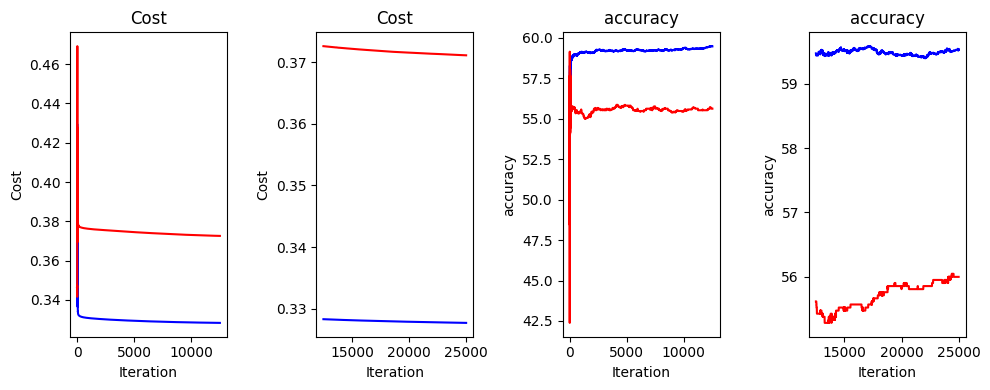

epoch 0: train cost 0.34657375 | dev cost 0.34658791 | train eval 50.00000000 | dev eval 42.38095238
epoch 100: train cost 0.33152332 | dev cost 0.36318215 | train eval 58.08516560 | dev eval 55.85714286
epoch 200: train cost 0.32834511 | dev cost 0.36225773 | train eval 58.93403841 | dev eval 55.09523810
epoch 300: train cost 0.32734266 | dev cost 0.36230954 | train eval 59.28889507 | dev eval 55.33333333
epoch 400: train cost 0.32680100 | dev cost 0.36245240 | train eval 59.22627331 | dev eval 55.23809524
epoch 500: train cost 0.32647065 | dev cost 0.36259305 | train eval 59.28889507 | dev eval 55.57142857
epoch 600: train cost 0.32627231 | dev cost 0.36273084 | train eval 59.45588645 | dev eval 55.52380952
epoch 700: train cost 0.32611829 | dev cost 0.36275760 | train eval 59.45588645 | dev eval 55.42857143
epoch 800: train cost 0.32600860 | dev cost 0.36277946 | train eval 59.49763429 | dev eval 55.42857143
epoch 900: train cost 0.32592307 | dev cost 0.36281171 | train eval 59.4698

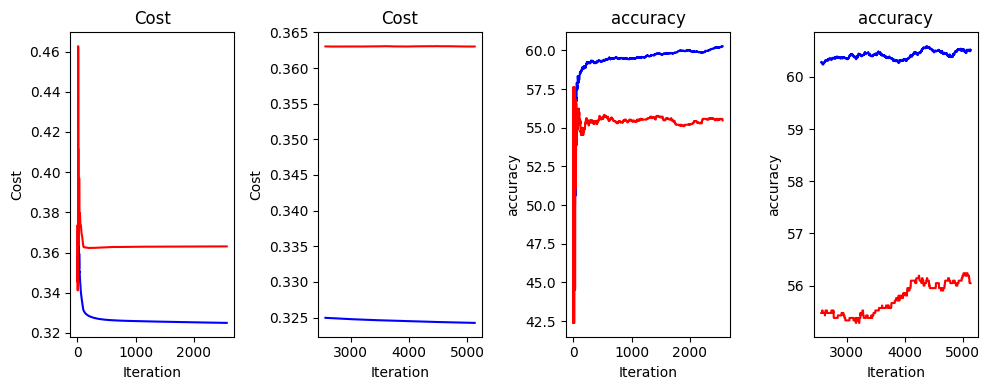

In [21]:
for model in models:
    J_hist, dev_hist, train_eval_hist, dev_eval_hist = model.train(X_train=x_train_normalized, 
                                                                        Y_train=y_train, 
                                                                        X_dev=x_dev_normalized, 
                                                                        Y_dev=y_dev, 
                                                                        # batch_size=1024, 
                                                                        epoch=25000, 
                                                                        learning_rate=0.1, 
                                                                        reg_lambda=1,
                                                                        patience=50, 
                                                                        optimizer='Adam'
                                                                        )
    


    fig, axes = plt.subplots(1, 4, figsize=(10, 4))  # 1 row, 4 columns

    l = len(J_hist) 
    # First plot
    axes[0].plot(np.arange(l//2), J_hist[0:l//2], color="blue")
    axes[0].plot(np.arange(l//2), dev_hist[0:l//2], color="r")

    axes[0].set_title("Cost")
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("Cost")


    axes[1].plot(np.arange(l//2,l), J_hist[l//2:l], color="blue")
    axes[1].plot(np.arange(l//2, l), dev_hist[l//2:l], color="r")

    axes[1].set_title("Cost")
    axes[1].set_xlabel("Iteration")
    axes[1].set_ylabel("Cost")
    # Second plot
    axes[2].plot(np.arange(l//2), train_eval_hist[0:l//2], color="b")
    axes[2].plot(np.arange(l//2), dev_eval_hist[0:l//2], color="r")

    axes[2].set_title("accuracy")
    axes[2].set_xlabel("Iteration")
    axes[2].set_ylabel("accuracy")

    # Second plot
    axes[3].plot(np.arange(l//2, l), train_eval_hist[l//2:l], color="b")
    axes[3].plot(np.arange(l//2, l), dev_eval_hist[l//2:l], color="r")

    axes[3].set_title("accuracy")
    axes[3].set_xlabel("Iteration")
    axes[3].set_ylabel("accuracy")

    plt.tight_layout()  # Adjust spacing
    plt.show()
   

In [22]:
# for i in range(3):
#     start_idx = i*50000

#     cost = J_hist[i*50000:(i+1)*50000]
    # dev_cost = dev_hist[i*50000:(i+1)*50000]
    # train_eval = train_eval_hist[i*50000:(i+1)*50000]
    # dev_eval = dev_eval_hist[i*50000:(i+1)*50000]

    # plt.plot(np.arange(50000), cost)
    # plt.plot(np.arange(50000), dev_cost)
    # plt.show()

    # plt.plot(np.arange(50000), train_eval)
    # plt.plot(np.arange(50000), dev_eval)
    # plt.show()


In [23]:
for model in models:
    eval = model.evaluate(x_test_normalized, y_test)
    print(eval)

55.85714285714286
57.333333333333336
